# Data Visualization:

Now make some pretty plots to visualize the data.

# Importing Libraries


In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import plotly_express  as px
import warnings
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud,STOPWORDS


warnings.filterwarnings('ignore')

# Importing Datasets

In [86]:
vamsidhar_books_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/books_data.csv')
vamsidhar_ratings_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/books_ratings_data.csv')
vamsidhar_book_tags_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/book_tags_data.csv')
vamsidhar_tags_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/tags_data.csv')


### Books Data

In [87]:
print(vamsidhar_books_data.shape)


(10000, 23)


In [88]:
print(list(vamsidhar_books_data.columns))

['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [89]:
vamsidhar_books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [90]:
vamsidhar_books_data.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [91]:
vamsi_important_columns = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

## Ratings Dataset

In [92]:
vamsidhar_ratings_data.shape

(981756, 3)

## Ratings data

In [93]:
print(vamsidhar_ratings_data.shape)
print(list(vamsidhar_ratings_data.columns))

(981756, 3)
['book_id', 'user_id', 'rating']


In [94]:
vamsidhar_ratings_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


## Ratings Distribution


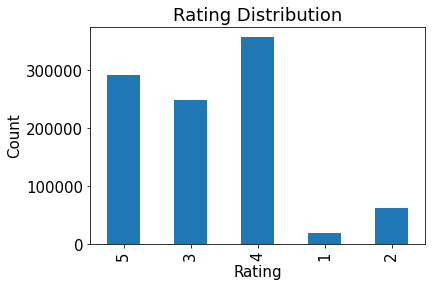

In [95]:
plt.rc("font", size = 15)
vamsidhar_ratings_data.rating.value_counts(sort = False).plot(kind = 'bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.plot()
plt.savefig("Ratings Distribution.jpg", bbox_inches = "tight", dpi = 100)

# 1. Data Visualization

### Sorting data according to the average ratings

In [96]:
sortedData = vamsidhar_books_data[vamsidhar_books_data['ratings_count']>=1500]
sortedData = sortedData.sort_values('average_rating', ascending=False)
print(sortedData)
# sortedData.head()

        id   book_id  best_book_id   work_id  books_count        isbn  \
3627  3628     24812         24812     25599           14   740748475   
3274  3275         8             8  21457576           11   439682584   
861    862  17332218      17332218  16482835           34   765326361   
8853  8854     95602         95602    920037            6   842339523   
7946  7947   5031805       5031805  40769318           96  1433502410   
...    ...       ...           ...       ...          ...         ...   
9020  9021     24929         24929   1130986           18    60988649   
4008  4009      6613          6613   2548756           57  080213825X   
8006  8007   8664368       8664368  13535892           45  1408808870   
3549  3550    783291        783291   1584738           63   316677469   
1792  1793    105578        105578    101770           25   345498321   

            isbn13                                     authors  \
3627  9.780741e+12                              Bill Watt

### 1.1 Top Rated Books

    
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Top rated books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
   
    


There is a clear visual representation of top rated books according to the average ratings provided on X-axis, which ranges from 0-5 only.

In [97]:
def top_rated_books(books_data):
    top_rated_books = books_data.sort_values('average_rating', ascending=False)
    df_top_rated = top_rated_books[:15]
    fig = px.bar(df_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings')
    fig.update_layout(xaxis_range=[0,5])
    fig.show()
top_rated_books(vamsidhar_books_data)
#vamsidhar_ratings_data

## 1.2 Popular Book

In [98]:
top_popular = vamsidhar_books_data.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
fig = px.bar(fifty_top_popular, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()

In [99]:
fig = px.treemap(fifty_top_popular, path=['original_title'], values='ratings_count',title='Popular Books', width=1000, height=700)
fig.show()

### 1.3 Best 15 books by Average rating

In the below bar graph, the bars are proportional to the values they represent, and the data is visualized using sns barplots. Average score has been taken on the X-axis and book title has been taken on the Y-axis. A visual representation of the bars is created by comparing both Average Score and book titles.

Text(0, 0.5, 'Book Title')

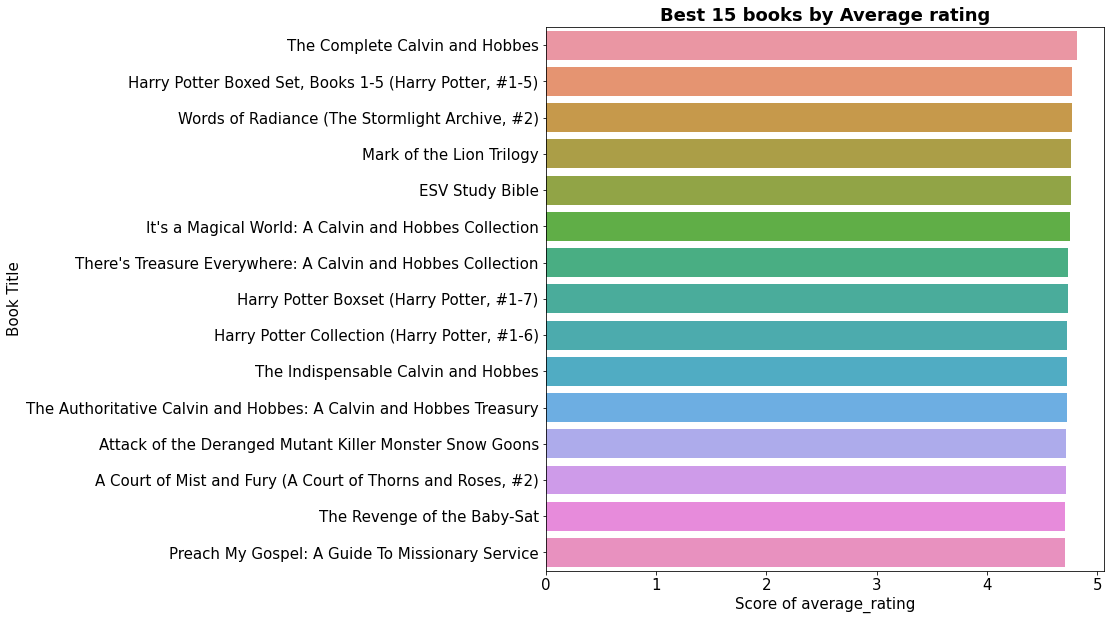

In [100]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=sortedData['average_rating'].head(15), y=sortedData['title'].head(15), data=sortedData)
plt.title('Best ' + str(15) + ' books by ' + 'average_rating'.replace('_',' ').capitalize(), weight='bold')
plt.xlabel('Score of ' + 'average_rating')
plt.ylabel('Book Title')    

### 1.4 Top rated books(average rating according to number of users)


We may observe many books with average rating equal to 10 and 0 as many of the books are rated only once, hence this can't show us a good visualisation



In [101]:
top_rated_books = vamsidhar_books_data[['title','average_rating']]
top_rated_books = top_rated_books.groupby('title', as_index=False)['average_rating'].mean()
top_rated_books = top_rated_books.sort_values('average_rating',ascending=False).reset_index()
top_rated_books = top_rated_books[['title','average_rating']]

top_rated_books.head()


,title,average_rating
0,The Complete Calvin and Hobbes,4.82
1,"Words of Radiance (The Stormlight Archive, #2)",4.77
2,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77
3,Mark of the Lion Trilogy,4.76
4,ESV Study Bible,4.76


In [102]:
top_rated_books.tail()

,title,average_rating
9959,Lost,2.80
9960,Four Blondes,2.80
9961,The Finkler Question,2.76
9962,The Almost Moon,2.67
9963,One Night at the Call Center,2.47


### 1.5 Average Ratings Distribution
    
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Average ratings for the books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
   
   

In this case, I have plotted average_rate from book data and represented numeric data as bars by                   dividing it into bins and visually representing each bin. Here it is very handy for quickly changing               the property of the bins or changing the display

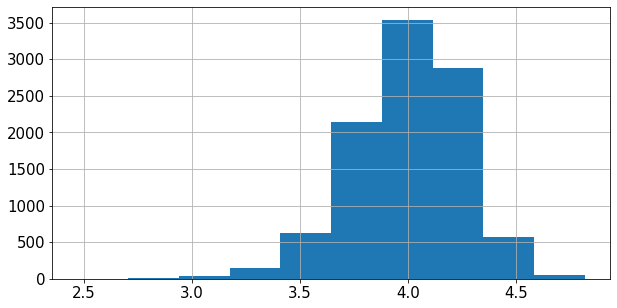

In [103]:
def avg_rating(vamsidhar_books_data):
    plt.figure(figsize=(10,5))
    vamsidhar_books_data["average_rating"].hist()
    display()
avg_rating(vamsidhar_books_data)

In [104]:
vamsidhar_books_data

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


# 2. Authors

### 2.1 Filter Authors 


In [105]:
vamsidhar_books_data.authors.value_counts()


Stephen King                                                                                                                                                                                                                              60
Nora Roberts                                                                                                                                                                                                                              59
Dean Koontz                                                                                                                                                                                                                               47
Terry Pratchett                                                                                                                                                                                                                           42
Agatha Christie                                     

In [106]:
a = []
vamsidhar_books_data.authors.apply(lambda x: a.append(x) if ',' in x else [])
a[:10]

['J.K. Rowling, Mary GrandPré',
 'George Orwell, Erich Fromm, Celâl Üster',
 'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré']

In [107]:
print('Number of books with multi-authors is {}.'.format(len(a)))

Number of books with multi-authors is 2079.


With Authors, it's difficult to make analysis on them because the goodreads data not just include the author(s), but also sometimes include the illustarator, translator and so on (separated by ',').

So it wouldn't be easy to know the number of books for each author as we can notice above.

So I thought in 3 solutions (and their drawbacks):

We can simply just take the first author for each book and remove the rest
Problem: there are books with co-authors, in addition, the main author doesn't always come in the 1st place (as above).
For books with multi-authors, we can sort them according to their number of occurrences in the whole data and just keep the most frequent one.
Problem: again, there are books with co-authors
We can scrape data for authors (if possible) from goodreads and remove the unwanted ones.
Problem: it will cost time and effort
So I decided to try playing with the recent data as possible, and maybe someone like the illustrator affect the book rating.

In [108]:
authors_list = vamsidhar_books_data['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [109]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [110]:
vamsi_df_edited_authors = vamsidhar_books_data[vamsi_important_columns].drop('authors', axis=1).join(splitted_authors)
vamsi_df_edited_authors.head()

,title,average_rating,ratings_count,work_text_reviews_count,authors
0,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,155254,Suzanne Collins
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,J.K. Rowling
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479,75867,Mary GrandPré
2,"Twilight (Twilight, #1)",3.57,3866839,95009,Stephenie Meyer
3,To Kill a Mockingbird,4.25,3198671,72586,Harper Lee


In [111]:
vamsi_df_edited_authors.authors.value_counts()


James Patterson           98
Stephen King              97
Nora Roberts              65
Dean Koontz               64
Terry Pratchett           50
                          ..
Noel Streatfeild           1
Diane Goode                1
Harry Gregson-Williams     1
Carolyn Brown              1
John Keegan                1
Name: authors, Length: 5841, dtype: int64

We can see now the difference as the previous largest number of books was 60 for Stephen King, now it's 98 for James Patterson.



In [112]:
def vamsi_plot_authors_by(df, title, xlabel, n=15, ylabel='Author', y_size=7):
    plt.figure(figsize=(15,y_size))
    ax = sns.barplot(x=df.head(n).values, y=df.head(n).index)
    plt.title(title, weight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### 2.2 Authors with Most Books 


In [113]:
authors_most_with_books = vamsi_df_edited_authors.authors.value_counts()
authors_most_with_books.head(15)

James Patterson        98
Stephen King           97
Nora Roberts           65
Dean Koontz            64
Terry Pratchett        50
Agatha Christie        43
Neil Gaiman            41
J.D. Robb              41
Meg Cabot              38
Janet Evanovich        37
David Baldacci         34
John Grisham           34
Anne Rice              33
Laurell K. Hamilton    31
Michael Connelly       29
Name: authors, dtype: int64

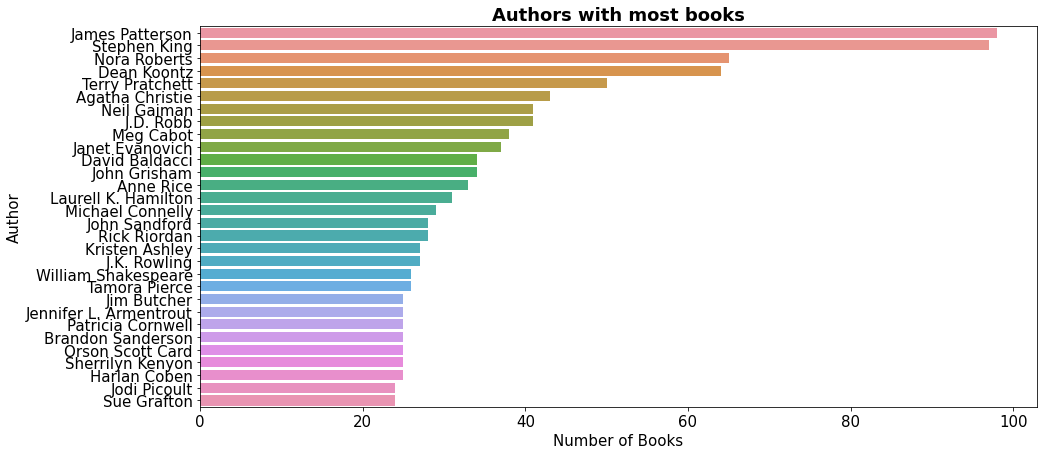

In [114]:
vamsi_plot_authors_by(authors_most_with_books, 'Authors with most books', 'Number of Books', 30)

### 2.3 Top Authors

    Author : Vamsidhar
    
    This function takes in a dataframe and visualize Top Authors for the books in the dataset.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
  
    



Interactive Barplot between count and the authors and visualized top authors of books in the dataset in the form of bar graph.

In [115]:
def topauthors(vamsidhar_books_data):
    top_authors = vamsidhar_books_data['authors'].value_counts().reset_index()
    top_authors.columns = ['authors', 'count']
    top_authors['authors'] = top_authors['authors']
    top_authors = top_authors.sort_values('count')
    fig = px.bar(top_authors.tail(10), x="count", y="authors", color='authors',
                 width=1000, height=700)
    fig.show()
topauthors(vamsidhar_books_data)

In [116]:
fifty_top_authors = vamsidhar_books_data[:50]
fig = px.treemap(fifty_top_authors, path=['authors'], values='average_rating',title='Popular Authors', width=1000, height=700)
fig.show()

### 2.4  Percentage of Ratings According to Authors

In [117]:
from plotly.offline import init_notebook_mode, iplot, plot


In [118]:
data1= vamsidhar_books_data.head(20)
data1.rename(columns={'ratings_1':'R1', 'ratings_2':'R2','ratings_3':'R3','ratings_4':'R4','ratings_5':'R5'}, inplace=True)

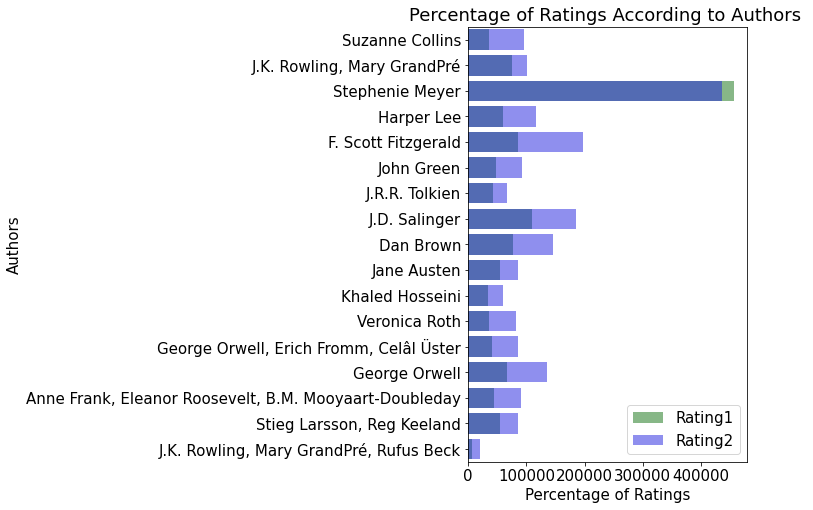

In [119]:
author_list= list(data1['authors'].unique())

ratings1= []
ratings2= []
for i in author_list:
    
    x = data1[data1['authors']==i]
    ratings1.append(sum(x.R1)/len(x))
    ratings2.append(sum(x.R2)/len(x))
    
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=ratings1,y=author_list,color='green',alpha = 0.5,label='Rating1' )
sns.barplot(x=ratings2,y=author_list,color='blue',alpha = 0.5,label='Rating2' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()


In [120]:
df2004 = vamsidhar_books_data[vamsidhar_books_data.original_publication_year == 2004].iloc[:200,:]
df2005 = vamsidhar_books_data[vamsidhar_books_data.original_publication_year == 2005].iloc[:200,:]
df2003 = vamsidhar_books_data[vamsidhar_books_data.original_publication_year == 2003].iloc[:200,:]

import plotly.graph_objs as go
trace1 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R1,
                    mode = "markers",
                    name = "2004",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2004.authors)
trace2 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R2,
                    mode = "markers",
                    name = "2005",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2005.authors)
trace3 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R3,
                    mode = "markers",
                    name = "2003",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2003.authors)
data = [trace1, trace2, trace3]
layout = dict(
              xaxis= dict(title= 'Average Ratings',ticklen= 9,zeroline= False),
              yaxis= dict(title= 'Ratings',ticklen= 9,zeroline= False),
              title = "Ratings and Avarage Ratings of 2004/2005/2006"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### 2.5 Number of Authors Ratings Rates
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the Number of Authors Ratings Rates for year 2015 and 2016.
    
    Params:
    -------------------
    input: books_data
           =>dataframe




In [121]:
def getpiechart(vamsidhar_books_data):
    df = vamsidhar_books_data[vamsidhar_books_data.original_publication_year == 2015].iloc[:7,:]
    pie1 = df.ratings_1
    df1 = vamsidhar_books_data[vamsidhar_books_data.original_publication_year == 2016].iloc[:7,:]
    pie2 = df1.ratings_1
    labels = df.authors.value_counts().index

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
                  1, 1)
    fig.add_trace(go.Pie(labels=labels, values=pie2, name="Number Of Authors Rates"),
                  1, 2)
    fig.update_traces(hole=.45, hoverinfo="label+percent+name")
    fig.update_layout(
        height=800, width=800,
        annotations=[dict(text='2015', x=0.175, y=0.5, font_size=14, showarrow=False),
                     dict(text='2016', x=0.82, y=0.5, font_size=14, showarrow=False)])
    fig.show()
getpiechart(vamsidhar_books_data)

### 2.6 Wordcloud of Authors
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the wordcloud of author.
    
    Params:
    -------------------
    input: books_data
           =>dataframe


### Visualising most frequent words in Author

Creating string variables for authors and original_title, also creating a function to plot WordCloud()

In [122]:
stop_words=set(STOPWORDS)
author_string = " ".join(vamsidhar_books_data['authors'])

In [123]:
vamsidhar_books_data.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [124]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

Displaying most frequent words in author names



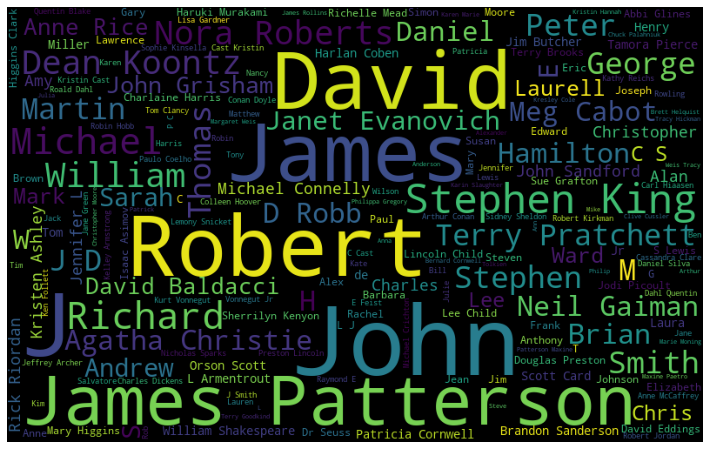

In [125]:
wordcloud(author_string)

## 3. Number of books in each year
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the histogram plot to visualize the number of books published each year.
    
    Params:
    -------------------
    input: books_data
           =>dataframe



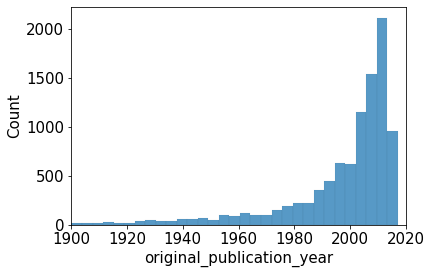

In [126]:
# Visualising Explicit Rating Countsdef get_histplot(books_data):
def get_histplot(vamsidhar_books_data):   
    sns.histplot(x="original_publication_year", data=vamsidhar_books_data, bins=1000)
    plt.xlim(1900,2020);
get_histplot(vamsidhar_books_data)

# 4. Language

The books.csv contains information on the languages of the books, as you might have noticed.Goodreads is an english language site, so this is interesting.There are some books in other languages in the dataset.There are often multiple editions of a book (both in the same language and in different languages).According to this dataset, the most popular edition was included, which for some books is their original language.

In [127]:
lang_counts = pd.DataFrame(vamsidhar_books_data['language_code'].value_counts())
lang_counts.columns = ['counts']
lang_counts

,counts
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13
per,7


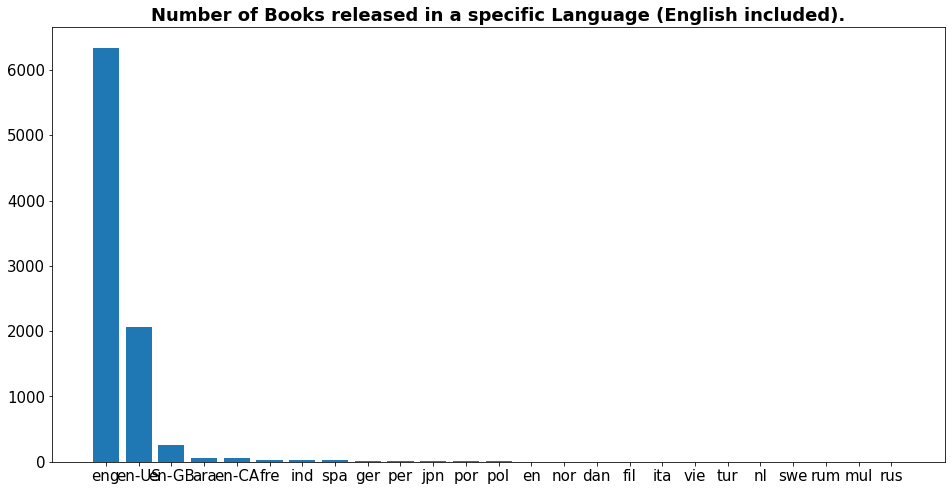

In [128]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English included).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

In [129]:
lang_counts = lang_counts.drop(["en-US", "en-GB", "eng", "en-CA"])

Number of Books released in a specific Language (English excluded)

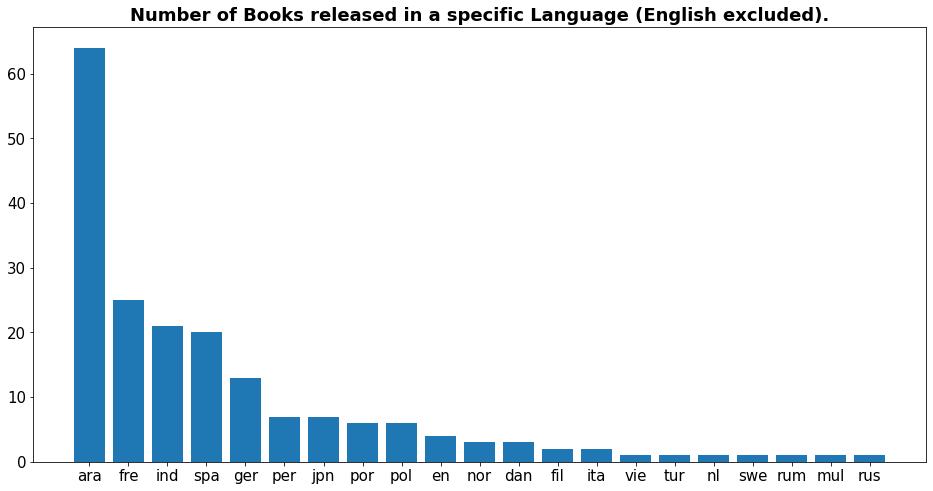

In [130]:
plt.figure(figsize=(16,8))
plt.title("Number of Books released in a specific Language (English excluded).", weight='bold')
plt.bar(x=lang_counts.index,height='counts', data=lang_counts);

# 5. Treemap
    Author : Vamsidhar
    
    This function takes in a dataframe and visualize dataset in form of Treemap.
    
    Params:
    -------------------
    input: books_data
           =>dataframe
    -------------------
    
    

The following treemap displays hierarchical data as nested rectangles. Each group is represented by a rectangle, whose area varies according to its value.

In [131]:
def get_treemap(vamsidhar_books_data):
    
    dropna= vamsidhar_books_data.dropna()
    fig = px.treemap(dropna, path=['original_publication_year','language_code', "average_rating"],
                      color='average_rating')
    fig.show()
get_treemap(vamsidhar_books_data)

# 6. Heatmap
    Author : Vamsidhar
    
    This function takes in a dataframe and returns the correlation between all the columns.
    
    Params:
    -------------------
    input: books_data
           =>dataframe


In [132]:
heatmap1= vamsidhar_books_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/books_data.csv')
heatmap2= vamsidhar_ratings_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/books_ratings_data.csv')
heatmap3= vamsidhar_book_tags_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/book_tags_data.csv')
heatmap4= vamsidhar_tags_data = pd.read_csv('/Users/vamsidharreddy/CMPE-255-Final-Project/data/book_tags_data.csv')

In [133]:
vamsidhar_df = heatmap1.drop(['id','book_id','best_book_id','work_id','isbn13'],axis=1)

In [134]:
vamsidhar_df

,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,272,439023483,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,226,316015849,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,441019455,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,19,067973371X,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,60,039330762X,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,7,61711527,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


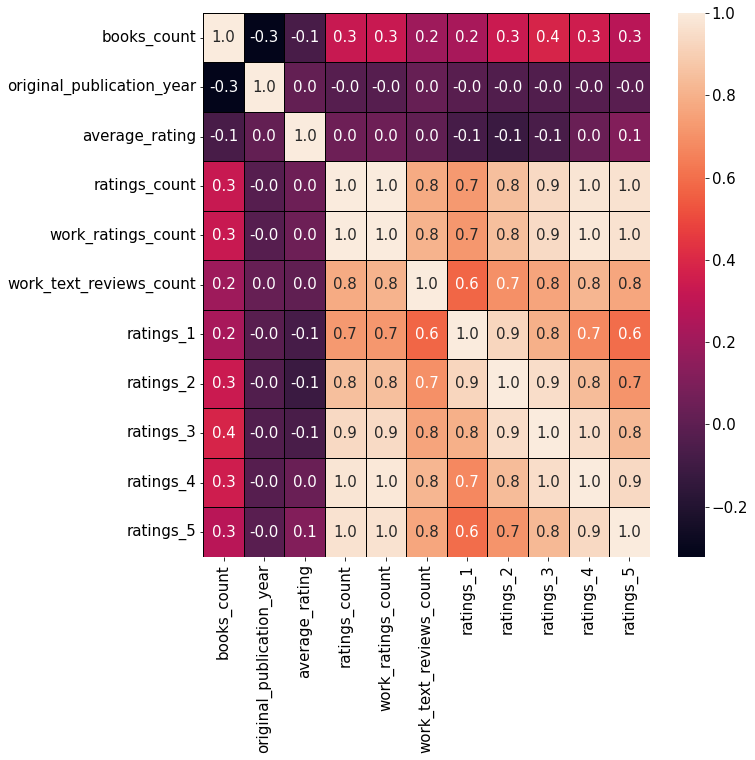

In [135]:
def get_heatmap(vamsidhar_df):
    f,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(vamsidhar_df.corr(), annot=True, linewidths=0.6,linecolor="black", fmt= '.1f',ax=ax)
    plt.show() 
get_heatmap(vamsidhar_df)